# Advanced Lane Detection

## Steps for Project
    1. Calibrate Camera using calibration matrix and distortion coefficients for given chessboard images
    2. Define a Undistortion ultility which undistors any frame of vide using calibration from step #1.
    3. Create a binary thresold image using sobel, color spaces techiniques taught in lesson.
    4. Use perspective transform to get birds eye view of the image.
    5. Find lanes.
    6. Determine curvature of the road.
    7. Unwrap the image back to original shape.
    8. Draw visual display of the lane detected


In [2]:
# Define all imports upfront
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Our utils
from im_utils import read_image, convert_gray

## Step 1: Calibrate camera and define a function to undistort camera

### 1.1 Calibrate Camera

In [3]:
cal_fnames = glob.glob('./camera_cal/calibration*.jpg')
print("Num of calibration images", len(cal_fnames))

Num of calibration images 20


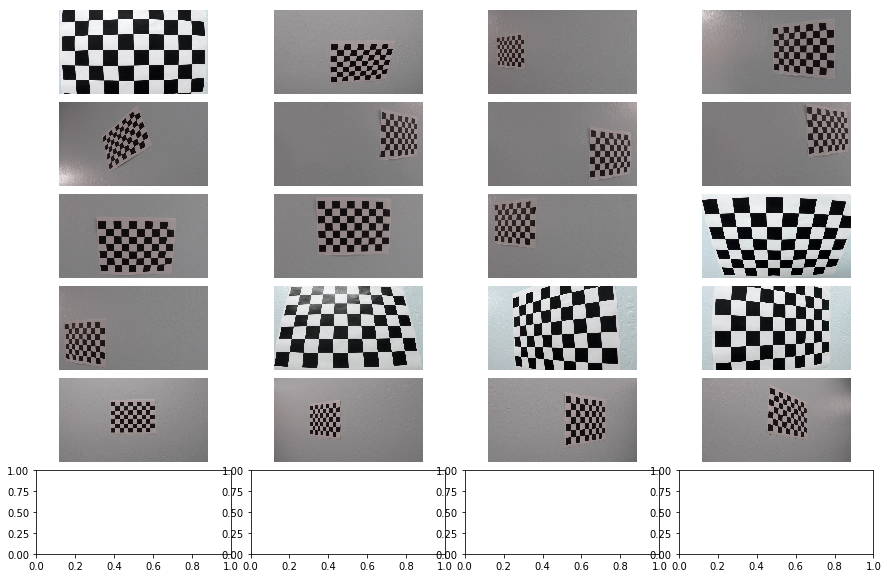

In [17]:
# Explore all images in a 5X4 grid.
def plot_images(images):
    # Plot 4 images per row
    fig, axs = plt.subplots(int(len(images) / 4) + 1, 4, figsize=(15, 10))
    fig.subplots_adjust(hspace = .1, wspace=.1)
    axs = axs.ravel()
    for i, img in enumerate(images):
        axs[i].axis('off')
        axs[i].imshow(img)

        
def explore_calibration_images():
    images = []
    for i, cal_fname in enumerate(cal_fnames):
        img = read_image(cal_fname)
        images.append(img)

    plot_images(images)
    

explore_calibration_images()    
    

In [28]:
# Get imagepoints and object points. This is similar to what has been taught in lesson. Except for the fact images provided
# in this project are 9X6

def get_camera_corners(image_paths):
    objp = np.zeros((6*9,3), np.float32)
    objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

    objpoints = [] 
    imgpoints = []
    img_with_corners = []
    
    for fname in image_paths:
        img = read_image(fname)
        gr_img = convert_gray(img)
        ret, corners = cv2.findChessboardCorners(gr_img, (9,6), None)
        
        if ret == True:
            cv2.drawChessboardCorners(img, (9,6), corners, ret)
            objpoints.append(objp)
            imgpoints.append(corners)
            img_with_corners.append(img)
            
    
    return (img_with_corners, objpoints, imgpoints)

img_with_corners, objpoints, imgpoints = get_camera_corners(cal_fnames)

def undistort_image(dimg):
    img_size = (dimg.shape[1], dimg.shape[0])
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
    undistored = cv2.undistort(dimg, mtx, dist, None, mtx)
    return undistored
    

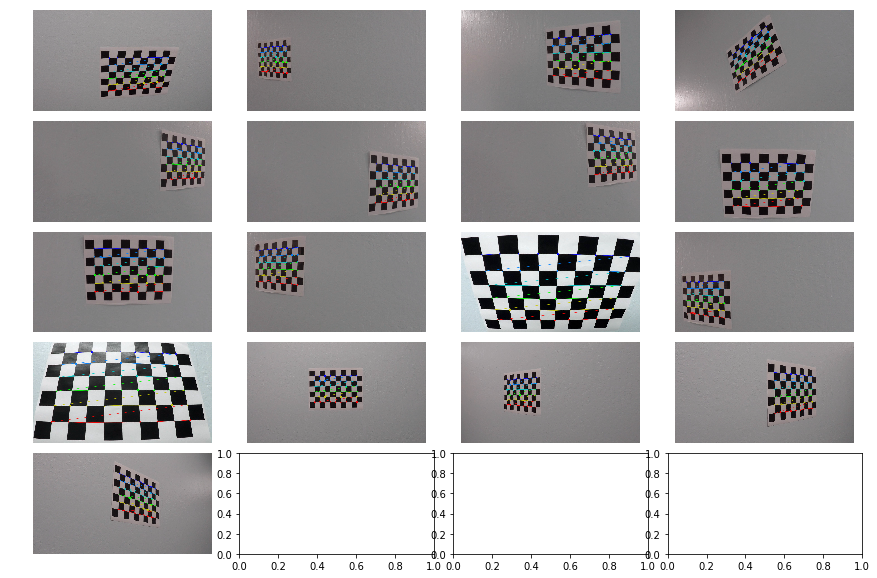

In [29]:
# Explore images after corners have been drawn
plot_images(img_with_corners)

Text(0.5,1,'UnDistorted Image')

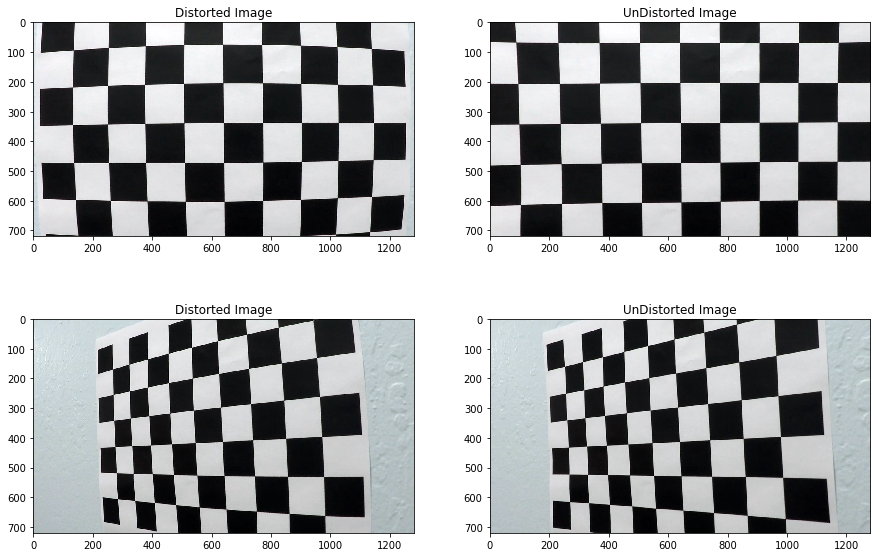

In [33]:
# Explore undistortion result
img = read_image('./camera_cal/calibration1.jpg')
dimg = undistort_image(img)

img2 = read_image('./camera_cal/calibration4.jpg')
dimg2 = undistort_image(img2)


f, axs = plt.subplots(2, 2, figsize=(15,10))
axs = axs.ravel()

axs[0].imshow(img)
axs[0].set_title('Distorted Image')
axs[1].imshow(dimg)
axs[1].set_title('UnDistorted Image')

axs[2].imshow(img2)
axs[2].set_title('Distorted Image')
axs[3].imshow(dimg2)
axs[3].set_title('UnDistorted Image')